In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
working_directory = os.getcwd()
data_folder =  os.path.join(working_directory, "data")
results_folder = os.path.join(working_directory, "results")

print(working_directory)
print(data_folder)
print(results_folder)

E:\GitHub\College-Enrollment-2020
E:\GitHub\College-Enrollment-2020\data
E:\GitHub\College-Enrollment-2020\results


<h1>Prepare Headcount (HC) Data from new datasource</h1>

In [3]:
# Read 2020 csv as pandas dataframe object
csv_HC = os.path.join(data_folder, 'headcount.csv')
print(csv_HC)
df_HC = pd.read_csv(csv_HC)

E:\GitHub\College-Enrollment-2020\data\headcount.csv


In [4]:
# Show the first 5 rows of a table
df_HC.head()

,Institution,Site,Academic_Year,Term,ZIP_Code,Full_or_Part_Time,Headcount
0,SLCC,Draper,2020,2,84020,Part-Time,2
1,SLCC,Draper,2020,2,84070,Part-Time,1
2,SLCC,Draper,2020,2,84104,Part-Time,1
3,SLCC,Draper,2020,2,84107,Part-Time,1
4,SLCC,Draper,2020,2,84124,Part-Time,1


In [5]:
df_HC.groupby('Institution').agg({'Headcount': [np.size, np.sum]})

Headcount       
                 size    sum
Institution                 
SLCC             1194  22560
USU               343   1238
UU                445  28932
UVU               354  25217
WSU               636  17138

In [6]:
df_HC.groupby(['Institution','Site']).agg({'Headcount': [np.size, np.sum]})

Headcount  \
                                                                    size   
Institution Site                                                           
SLCC        Draper                                                     5   
            Main Campus                                              235   
            SLCC Airport Center                                       75   
            SLCC Herriman Center                                      47   
            SLCC Jordan Campus                                       187   
            SLCC Larry H. Miller Campus                              161   
            SLCC Library Square Center (Previously Main Str...        97   
            SLCC Meadowbrook Campus                                   31   
            SLCC South City Center                                   175   
            SLCC West Point Center                                   122   
            SLCC West Valley City                                     59   
USU         Mountainland Technical College                            19   
            USU Brigham Center                                       109   
            USU Ogden Center                                          67   
            USU Orem Center                                           31   
            USU Salt Lake Center                                      90   
            USU Tooele Center                                         27   
UU          Main Campus                                              357   
            UofU Sandy Center                                         88   
UVU         Main Campus                                              354   
WSU         Davis Technical College                                   26   
            Main Campus                                              299   
            Ogden-Weber Technical College                             12   
            SLCC                                                      47   
            WSU Davis Center                                         164   
            WSU Farmington Station                                    56   
            WSU West Center                                           32   

                                                                       
                                                                  sum  
Institution Site                                                       
SLCC        Draper                                                  6  
            Main Campus                                         11910  
            SLCC Airport Center                                   129  
            SLCC Herriman Center                                  283  
            SLCC Jordan Campus                                   4166  
            SLCC Larry H. Miller Campus                          1038  
            SLCC Library Square Center (Previously Main Str...    303  
            SLCC Meadowbrook Campus                                49  
            SLCC South City Center                               3694  
            SLCC West Point Center                                509  
            SLCC West Valley City                                 473  
USU         Mountainland Technical College                         24  
            USU Brigham Center                                    464  
            USU Ogden Center                                      202  
            USU Orem Center                                        80  
            USU Salt Lake Center                                  272  
            USU Tooele Center                                     196  
UU          Main Campus                                         28166  
            UofU Sandy Center                                     766  
UVU         Main Campus                                         25217  
WSU         Davis Technical College                                63  
            Main Campus                               

In [7]:
df_HC.groupby(['Institution','Site']).agg({'Headcount': [np.size, np.sum]}).sum()

Headcount  size     2972
           sum     95085
dtype: int64

<h1>Create HC DataFrames for Each College</h1>

In [8]:
#Create DataFrame for UofU Main Campus adding together Part-Time and Full-Time (size)
df_HC_UUMain = df_HC[(df_HC['Institution'] == 'UU') & (df_HC['Site'] == 'Main Campus')].groupby(['Institution','Site','ZIP_Code'], as_index=False).agg({'Headcount': [np.size, np.sum]})
df_HC_UUMain

Institution         Site ZIP_Code Headcount     
                                           size  sum
0            UU  Main Campus    84003         2  252
1            UU  Main Campus    84004         2   67
2            UU  Main Campus    84005         2   92
3            UU  Main Campus    84006         2    7
4            UU  Main Campus    84007         1    1
..          ...          ...      ...       ...  ...
209          UU  Main Campus    84780         2   20
210          UU  Main Campus    84781         1    1
211          UU  Main Campus    84782         1    1
212          UU  Main Campus    84783         1    1
213          UU  Main Campus    84790         2   72

[214 rows x 5 columns]

In [9]:
#Create DataFrame for UVU Main Campus adding together Part-Time and Full-Time
df_HC_UVUMain = df_HC[(df_HC['Institution'] == 'UVU') & (df_HC['Site'] == 'Main Campus')].groupby(['Institution','Site','ZIP_Code'], as_index=False).agg({'Headcount': [np.size, np.sum]})
df_HC_UVUMain

Institution         Site ZIP_Code Headcount      
                                           size   sum
0           UVU  Main Campus    84001         1     1
1           UVU  Main Campus    84003         2  1392
2           UVU  Main Campus    84004         2   304
3           UVU  Main Campus    84005         2   553
4           UVU  Main Campus    84006         1     1
..          ...          ...      ...       ...   ...
201         UVU  Main Campus    84780         2    22
202         UVU  Main Campus    84781         1     1
203         UVU  Main Campus    84790         2    48
204         UVU  Main Campus    84791         1     1
205         UVU  Main Campus    84907         1     1

[206 rows x 5 columns]

In [10]:
#Create DataFrame for UVU Main Campus adding together Part-Time and Full-Time
df_HC_SLCCMain = df_HC[(df_HC['Institution'] == 'SLCC') & (df_HC['Site'] == 'Main Campus')].groupby(['Institution','Site','ZIP_Code'], as_index=False).agg({'Headcount': [np.size, np.sum]})
df_HC_SLCCMain

Institution         Site ZIP_Code Headcount     
                                           size  sum
0          SLCC  Main Campus    84003         2   61
1          SLCC  Main Campus    84004         2   20
2          SLCC  Main Campus    84005         2   57
3          SLCC  Main Campus    84006         1    4
4          SLCC  Main Campus    84009         2  249
..          ...          ...      ...       ...  ...
139        SLCC  Main Campus    84741         1    2
140        SLCC  Main Campus    84765         1    1
141        SLCC  Main Campus    84770         2    5
142        SLCC  Main Campus    84780         2    7
143        SLCC  Main Campus    84790         2    8

[144 rows x 5 columns]

In [11]:
#Create DataFrame for UVU Main Campus adding together Part-Time and Full-Time
df_HC_WSUMain = df_HC[(df_HC['Institution'] == 'WSU') & (df_HC['Site'] == 'Main Campus')].groupby(['Institution','Site','ZIP_Code'], as_index=False).agg({'Headcount': [np.size, np.sum]})
df_HC_WSUMain

Institution         Site ZIP_Code Headcount    
                                           size sum
0           WSU  Main Campus    84001         1   1
1           WSU  Main Campus    84003         2  16
2           WSU  Main Campus    84004         2   6
3           WSU  Main Campus    84005         2   9
4           WSU  Main Campus    84009         2  19
..          ...          ...      ...       ...  ..
174         WSU  Main Campus    84765         1   2
175         WSU  Main Campus    84770         2   5
176         WSU  Main Campus    84780         2   8
177         WSU  Main Campus    84784         1   1
178         WSU  Main Campus    84790         2  12

[179 rows x 5 columns]

<h1>Prepare BaseDistribution (BD) from TDM Data</h1>

In [12]:
#read in TAZ and ZIPCode table
csv_tazzip = os.path.join(data_folder, 'TAZ_ZipCode.csv')
df_tazzip = pd.read_csv(csv_tazzip)
df_tazzip

,FID,TAZID,ZIP5
0,0,460,84075
1,1,461,84015
2,2,656,84116
3,3,657,84116
4,4,2696,84651
...,...,...,...
2876,2876,2307,84097
2877,2877,692,84044
2878,2878,697,84044
2879,2879,698,84044


In [13]:
#read in base enrollment distribution file from TDM
csv_BD = os.path.join(data_folder, 'BaseDistribution.csv')
df_BD = pd.read_csv(csv_BD)
df_BD

,;Z,Airport,Lagoon,LDSBC,Westmin,UofU_Main,UofU_Med,WSU_Ogden,WSU_Davis,WSU_West,...,SLCC_HL,SLCC_Airp,SLCC_West,SLCC_HM,BYU,UVU_main,UVU_Geneva,UVU_ThankP,UVU_VINE,UVU_PAYSON
0,1,0,0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2876,2877,0,0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2877,2878,0,0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2878,2879,0,0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2879,2880,0,0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#read in lookup for TDMCodes to Institution/Site of Headcount Data
#lookup only includes institutions and sites that are in both headcount and base distribution dataset
#so, no BYU, Westminster, or USU records
csv_tdmcode_to_instsite = os.path.join(data_folder, 'TDMCodes_to_InstitutionSite.csv')
df_tdmcode_to_instsite = pd.read_csv(csv_tdmcode_to_instsite)
df_tdmcode_to_instsite

,TDMCode,Institution,Site
0,SLCC_TL,SLCC,Main Campus
1,SLCC_Airp,SLCC,SLCC Airport Center
2,SLCC_HM,SLCC,SLCC Herriman Center
3,SLCC_JD,SLCC,SLCC Jordan Campus
4,SLCC_ML,SLCC,SLCC Larry H. Miller Campus
5,SLCC_LB,SLCC,SLCC Library Square Center (Previously Main St...
6,SLCC_Mead,SLCC,SLCC Meadowbrook Campus
7,SLCC_SC,SLCC,SLCC South City Center
8,SLCC_West,SLCC,SLCC West Point Center
9,UofU_Main,UU,Main Campus


In [15]:
#normalize (reverse pivot) base distribution matrix data for easier manipulation
df_BD_rows = pd.melt(df_BD, 
                    id_vars=';Z', 
                    value_vars=list(df_BD.columns[1:]), # list of days of the week
                    var_name='TDMCampus', 
                    value_name='BaseDistribution')
df_BD_rows

,;Z,TDMCampus,BaseDistribution
0,1,Airport,0.0
1,2,Airport,0.0
2,3,Airport,0.0
3,4,Airport,0.0
4,5,Airport,0.0
...,...,...,...
72020,2877,UVU_PAYSON,0.0
72021,2878,UVU_PAYSON,0.0
72022,2879,UVU_PAYSON,0.0
72023,2880,UVU_PAYSON,0.0


In [16]:
#join to lookup table to get Institutuion and Site (IS)
df_BD_rows_IS = df_BD_rows.merge(df_tdmcode_to_instsite, left_on = 'TDMCampus', right_on = 'TDMCode' , how = 'inner')
df_BD_rows_IS

,;Z,TDMCampus,BaseDistribution,TDMCode,Institution,Site
0,1,UofU_Main,0.0,UofU_Main,UU,Main Campus
1,2,UofU_Main,0.0,UofU_Main,UU,Main Campus
2,3,UofU_Main,0.0,UofU_Main,UU,Main Campus
3,4,UofU_Main,0.0,UofU_Main,UU,Main Campus
4,5,UofU_Main,0.0,UofU_Main,UU,Main Campus
...,...,...,...,...,...,...
40329,2877,UVU_main,0.0,UVU_main,UVU,Main Campus
40330,2878,UVU_main,0.0,UVU_main,UVU,Main Campus
40331,2879,UVU_main,0.0,UVU_main,UVU,Main Campus
40332,2880,UVU_main,0.0,UVU_main,UVU,Main Campus


In [17]:
#check size and totals, size should equal number of TAZs(2881)
df_BD_rows_IS.groupby(['Institution','Site']).agg({'BaseDistribution': [np.size, np.sum]})

BaseDistribution  \
                                                                           size   
Institution Site                                                                  
SLCC        Main Campus                                                  2881.0   
            SLCC Airport Center                                          2881.0   
            SLCC Herriman Center                                         2881.0   
            SLCC Jordan Campus                                           2881.0   
            SLCC Larry H. Miller Campus                                  2881.0   
            SLCC Library Square Center (Previously Main Str...           2881.0   
            SLCC Meadowbrook Campus                                      2881.0   
            SLCC South City Center                                       2881.0   
            SLCC West Point Center                                       2881.0   
UU          Main Campus                                                  2881.0   
UVU         Main Campus                                                  2881.0   
WSU         Main Campus                                                  2881.0   
            WSU Davis Center                                             2881.0   
            WSU West Center                                              2881.0   

                                                                         
                                                                    sum  
Institution Site                                                         
SLCC        Main Campus                                           381.0  
            SLCC Airport Center                                     0.0  
            SLCC Herriman Center                                    0.0  
            SLCC Jordan Campus                                     80.0  
            SLCC Larry H. Miller Campus                            25.0  
            SLCC Library Square Center (Previously Main Str...     12.0  
            SLCC Meadowbrook Campus                                 0.0  
            SLCC South City Center                                 88.0  
            SLCC West Point Center                                  0.0  
UU          Main Campus                                         20808.0  
UVU         Main Campus                                         26100.0  
WSU         Main Campus                                           836.0  
            WSU Davis Center                                      108.0  
            WSU West Center                                         5.0

In [18]:
#join to tazzip to get zip code (ZC)
df_BD_rows_IS_ZC = df_BD_rows_IS.merge(df_tazzip, left_on = ';Z', right_on = 'TAZID' , how = 'inner')

#group by Institution, Site, and ZIP5
df_BD_rows_IS_ZC.groupby(['Institution','Site','ZIP5']).agg({'BaseDistribution': [np.size, np.sum]})

BaseDistribution     
                                              size  sum
Institution Site            ZIP5                       
SLCC        Main Campus     84003             70.0  1.0
                            84004             11.0  0.0
                            84005             68.0  6.0
                            84006             15.0  1.0
                            84009             45.0  6.0
...                                            ...  ...
WSU         WSU West Center 84653             29.0  0.0
                            84655             40.0  0.0
                            84660            139.0  0.0
                            84663             61.0  0.0
                            84664             18.0  0.0

[1274 rows x 2 columns]

In [19]:
#create DataFrame for UofU Main
inst = df_BD_rows_IS_ZC['Institution']=="UU"
site = df_BD_rows_IS_ZC['Site']=="Main Campus"
df_BD_UUMain = df_BD_rows_IS_ZC[inst & site].groupby(['ZIP5'], as_index=False).agg({'BaseDistribution': [np.size, np.sum]})
df_BD_UUMain

ZIP5 BaseDistribution        
                      size     sum
0   84003             70.0  101.15
1   84004             11.0   37.40
2   84005             68.0    5.10
3   84006             15.0    0.85
4   84009             45.0   85.85
..    ...              ...     ...
86  84653             29.0   13.60
87  84655             40.0    7.65
88  84660            139.0   27.20
89  84663             61.0   24.65
90  84664             18.0    7.65

[91 rows x 3 columns]

In [20]:
#create DataFrame for UVU Main
inst = df_BD_rows_IS_ZC['Institution']=="UVU"
site = df_BD_rows_IS_ZC['Site']=="Main Campus"
df_BD_UVUMain = df_BD_rows_IS_ZC[inst & site].groupby(['ZIP5'], as_index=False).agg({'BaseDistribution': [np.size, np.sum]})
df_BD_UVUMain

ZIP5 BaseDistribution        
                      size     sum
0   84003             70.0  1472.0
1   84004             11.0   328.0
2   84005             68.0   375.0
3   84006             15.0     1.0
4   84009             45.0    70.0
..    ...              ...     ...
86  84653             29.0   314.0
87  84655             40.0   248.0
88  84660            139.0  1420.0
89  84663             61.0   983.0
90  84664             18.0   340.0

[91 rows x 3 columns]

In [21]:
#create DataFrame for UVU Main
inst = df_BD_rows_IS_ZC['Institution']=="SLCC"
site = df_BD_rows_IS_ZC['Site']=="Main Campus"
df_BD_SLCCMain = df_BD_rows_IS_ZC[inst & site].groupby(['ZIP5'], as_index=False).agg({'BaseDistribution': [np.size, np.sum]})
df_BD_SLCCMain

ZIP5 BaseDistribution     
                      size  sum
0   84003             70.0  1.0
1   84004             11.0  0.0
2   84005             68.0  6.0
3   84006             15.0  1.0
4   84009             45.0  6.0
..    ...              ...  ...
86  84653             29.0  0.0
87  84655             40.0  0.0
88  84660            139.0  6.0
89  84663             61.0  0.0
90  84664             18.0  2.0

[91 rows x 3 columns]

In [22]:
#create DataFrame for UVU Main
inst = df_BD_rows_IS_ZC['Institution']=="WSU"
site = df_BD_rows_IS_ZC['Site']=="Main Campus"
df_BD_WSUMain = df_BD_rows_IS_ZC[inst & site].groupby(['ZIP5'], as_index=False).agg({'BaseDistribution': [np.size, np.sum]})
df_BD_WSUMain

ZIP5 BaseDistribution     
                      size  sum
0   84003             70.0  2.0
1   84004             11.0  0.0
2   84005             68.0  0.0
3   84006             15.0  0.0
4   84009             45.0  0.0
..    ...              ...  ...
86  84653             29.0  0.0
87  84655             40.0  0.0
88  84660            139.0  5.0
89  84663             61.0  0.0
90  84664             18.0  0.0

[91 rows x 3 columns]

<h1>Compare Headcount and Base Distribution - Total</h1>

In [23]:
df_HC_total = df_HC.groupby(['Institution','Site'], as_index=False).agg({'Headcount': [np.sum]})
df_BD_rows_IS_total = df_BD_rows_IS.groupby(['Institution','Site'], as_index=False).agg({'BaseDistribution': [np.sum]})

df_HC_BD_total_compare = df_BD_rows_IS_total.merge(df_HC_total, on=['Institution','Site'], how="inner")

#collapse multi-level
df_HC_BD_total_compare.columns = df_HC_BD_total_compare.columns.get_level_values(0)

#create difference column
df_HC_BD_total_compare['Difference'] =  df_HC_BD_total_compare.apply(lambda row: row.BaseDistribution - row.Headcount, axis = 1)

#format with commas
df_HC_BD_total_compare_table = df_HC_BD_total_compare.copy()
df_HC_BD_total_compare_table['BaseDistribution'] = df_HC_BD_total_compare_table.apply(lambda x: "{:,.0f}".format(x['BaseDistribution']), axis=1)
df_HC_BD_total_compare_table['Headcount'] = df_HC_BD_total_compare_table.apply(lambda x: "{:,.0f}".format(x['Headcount']), axis=1)
df_HC_BD_total_compare_table['Difference'] = df_HC_BD_total_compare_table.apply(lambda x: "{:,.0f}".format(x['Difference']), axis=1)
df_HC_BD_total_compare_table

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,Institution,Site,BaseDistribution,Headcount,Difference
0,SLCC,Main Campus,381,"11,910","-11,529"
1,SLCC,SLCC Airport Center,0,129,-129
2,SLCC,SLCC Herriman Center,0,283,-283
3,SLCC,SLCC Jordan Campus,80,"4,166","-4,086"
4,SLCC,SLCC Larry H. Miller Campus,25,"1,038","-1,013"
5,SLCC,SLCC Library Square Center (Previously Main St...,12,303,-291
6,SLCC,SLCC Meadowbrook Campus,0,49,-49
7,SLCC,SLCC South City Center,88,"3,694","-3,606"
8,SLCC,SLCC West Point Center,0,509,-509
9,UU,Main Campus,"20,808","28,166","-7,358"


In [24]:
import matplotlib.ticker as mtick

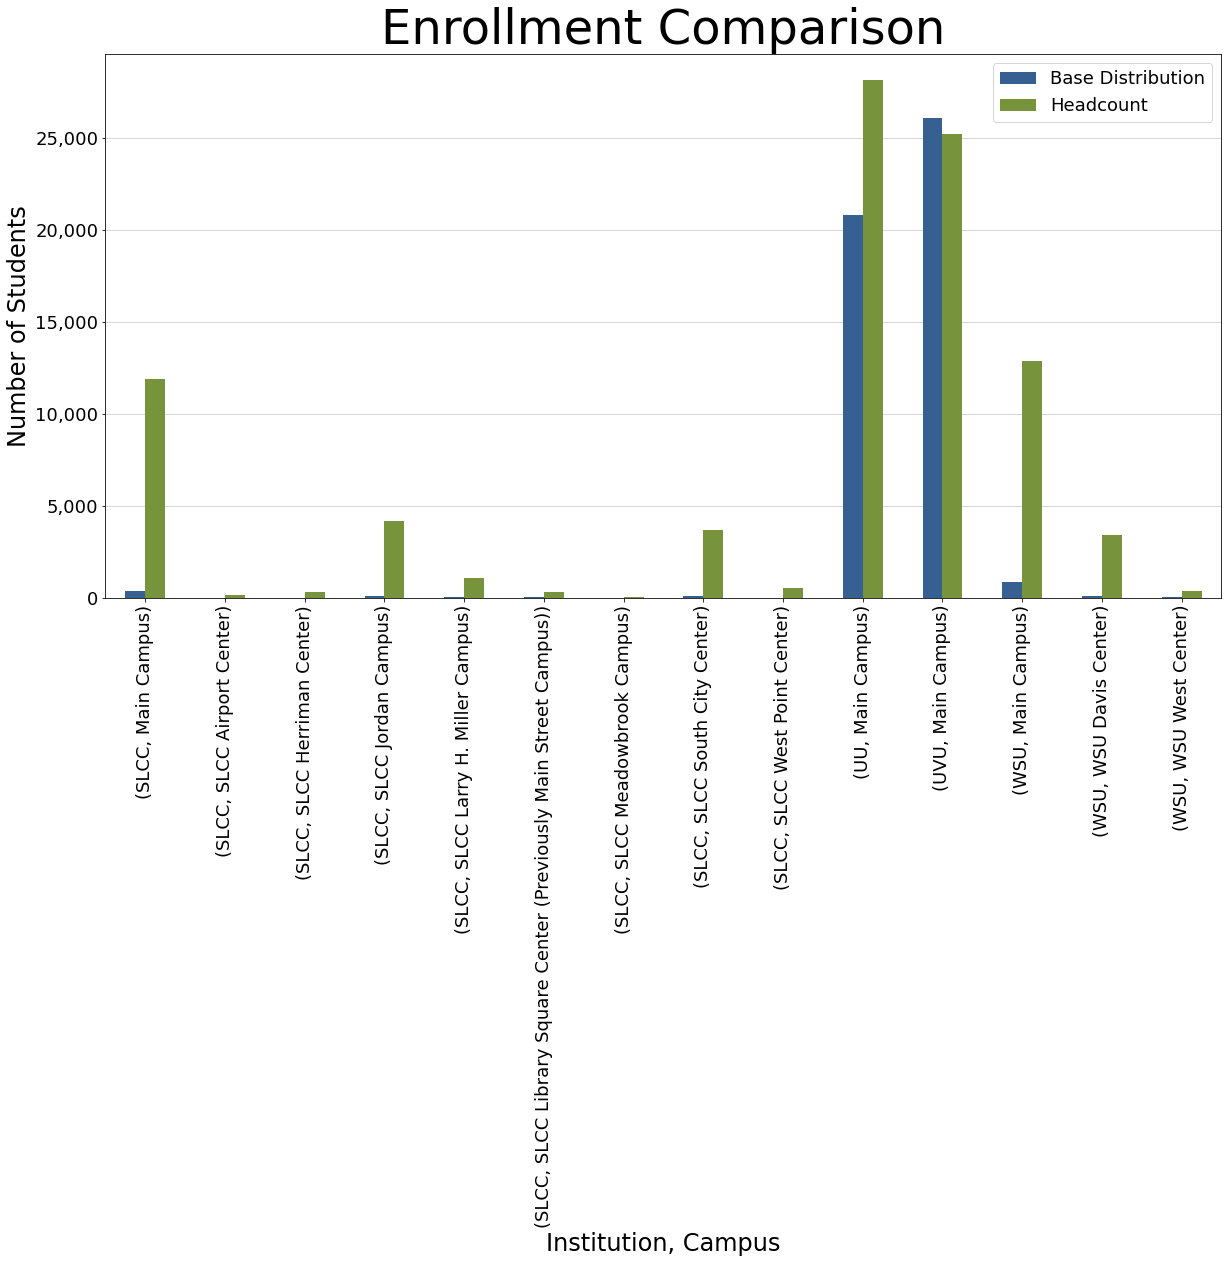

In [25]:
axr = df_HC_BD_total_compare.groupby(['Institution','Site']).agg({'BaseDistribution': [np.sum],'Headcount': [np.sum]}).plot.bar(figsize=(20,10), fontsize=18, color={"#376092", "#77933c"}, zorder=10)
axr.set_xlabel("Institution, Campus", fontsize=24)
axr.set_ylabel("Number of Students", fontsize=24)
axr.set_title("Enrollment Comparison", fontsize=48)
axr.legend(["Base Distribution", "Headcount"], prop=dict(size=18));
axr.grid('on', which='major', axis='y', linestyle='-', linewidth=0.5, zorder=1)
axr.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

<h1>Compare Headcount and Base Distribution - Main Campuses</h1>

In [26]:
#Compare UofU Main Campus
df_comp_UUMain = df_HC_UUMain.merge(df_BD_UUMain, left_on = 'ZIP_Code', right_on = 'ZIP5' , how = 'inner')
df_comp_UUMain

Institution         Site ZIP_Code Headcount        ZIP5 BaseDistribution  \
                                          size  sum                    size   
0           UU  Main Campus    84003         2  252  84003             70.0   
1           UU  Main Campus    84004         2   67  84004             11.0   
2           UU  Main Campus    84005         2   92  84005             68.0   
3           UU  Main Campus    84006         2    7  84006             15.0   
4           UU  Main Campus    84009         2  351  84009             45.0   
..         ...          ...      ...       ...  ...    ...              ...   
81          UU  Main Campus    84653         2   24  84653             29.0   
82          UU  Main Campus    84655         2   10  84655             40.0   
83          UU  Main Campus    84660         2   80  84660            139.0   
84          UU  Main Campus    84663         2   68  84663             61.0   
85          UU  Main Campus    84664         2   28  84664             18.0   

            
       sum  
0   101.15  
1    37.40  
2     5.10  
3     0.85  
4    85.85  
..     ...  
81   13.60  
82    7.65  
83   27.20  
84   24.65  
85    7.65  

[86 rows x 8 columns]

In [27]:
#check duplicate records by looking at ZIP_Code size (sort descending). Should be max of 1. 
df_comp_UUMain.groupby(['ZIP_Code']).agg({'ZIP_Code': [np.size]}).sort_values(by=('ZIP_Code','size'), ascending=False).head(10)

,ZIP_Code
,size
ZIP_Code,
84003,1
84116,1
84124,1
84123,1
84122,1
84121,1
84120,1
84119,1


In [28]:
#check data types
df_comp_UUMain.dtypes

Institution                object
Site                       object
ZIP_Code                    int64
Headcount         size      int64
                  sum       int64
ZIP5                        int64
BaseDistribution  size    float64
                  sum     float64
dtype: object

In [29]:
#Compare UVU Main Campus
df_comp_UVUMain = df_HC_UVUMain.merge(df_BD_UVUMain, left_on = 'ZIP_Code', right_on = 'ZIP5' , how = 'inner')
df_comp_UVUMain

Institution         Site ZIP_Code Headcount         ZIP5 BaseDistribution  \
                                          size   sum                    size   
0          UVU  Main Campus    84003         2  1392  84003             70.0   
1          UVU  Main Campus    84004         2   304  84004             11.0   
2          UVU  Main Campus    84005         2   553  84005             68.0   
3          UVU  Main Campus    84006         1     1  84006             15.0   
4          UVU  Main Campus    84009         2   199  84009             45.0   
..         ...          ...      ...       ...   ...    ...              ...   
82         UVU  Main Campus    84653         2   303  84653             29.0   
83         UVU  Main Campus    84655         2   200  84655             40.0   
84         UVU  Main Campus    84660         2   915  84660            139.0   
85         UVU  Main Campus    84663         2   860  84663             61.0   
86         UVU  Main Campus    84664         2   308  84664             18.0   

            
       sum  
0   1472.0  
1    328.0  
2    375.0  
3      1.0  
4     70.0  
..     ...  
82   314.0  
83   248.0  
84  1420.0  
85   983.0  
86   340.0  

[87 rows x 8 columns]

In [30]:
#check duplicate records by looking at ZIP_Code size (sort descending). Should be max of 1. 
df_comp_UVUMain.groupby(['ZIP_Code']).agg({'ZIP_Code': [np.size]}).sort_values(by=('ZIP_Code','size'), ascending=False).head(10)

,ZIP_Code
,size
ZIP_Code,
84003,1
84117,1
84129,1
84128,1
84124,1
84123,1
84121,1
84120,1


In [31]:
#Compare SLCC Main Campus
df_comp_SLCCMain = df_HC_SLCCMain.merge(df_BD_SLCCMain, left_on = 'ZIP_Code', right_on = 'ZIP5' , how = 'inner')
df_comp_SLCCMain

Institution         Site ZIP_Code Headcount        ZIP5 BaseDistribution  \
                                          size  sum                    size   
0         SLCC  Main Campus    84003         2   61  84003             70.0   
1         SLCC  Main Campus    84004         2   20  84004             11.0   
2         SLCC  Main Campus    84005         2   57  84005             68.0   
3         SLCC  Main Campus    84006         1    4  84006             15.0   
4         SLCC  Main Campus    84009         2  249  84009             45.0   
..         ...          ...      ...       ...  ...    ...              ...   
75        SLCC  Main Campus    84651         2    4  84651             92.0   
76        SLCC  Main Campus    84655         1    5  84655             40.0   
77        SLCC  Main Campus    84660         2   13  84660            139.0   
78        SLCC  Main Campus    84663         2    8  84663             61.0   
79        SLCC  Main Campus    84664         2    4  84664             18.0   

         
    sum  
0   1.0  
1   0.0  
2   6.0  
3   1.0  
4   6.0  
..  ...  
75  0.0  
76  0.0  
77  6.0  
78  0.0  
79  2.0  

[80 rows x 8 columns]

In [32]:
#Compare SLCC Main Campus
df_comp_WSUMain = df_HC_WSUMain.merge(df_BD_WSUMain, left_on = 'ZIP_Code', right_on = 'ZIP5' , how = 'inner')
df_comp_WSUMain

Institution         Site ZIP_Code Headcount        ZIP5 BaseDistribution  \
                                          size  sum                    size   
0          WSU  Main Campus    84003         2   16  84003             70.0   
1          WSU  Main Campus    84004         2    6  84004             11.0   
2          WSU  Main Campus    84005         2    9  84005             68.0   
3          WSU  Main Campus    84009         2   19  84009             45.0   
4          WSU  Main Campus    84010         2  341  84010             29.0   
..         ...          ...      ...       ...  ...    ...              ...   
76         WSU  Main Campus    84653         2    3  84653             29.0   
77         WSU  Main Campus    84655         2    6  84655             40.0   
78         WSU  Main Campus    84660         2   12  84660            139.0   
79         WSU  Main Campus    84663         2    9  84663             61.0   
80         WSU  Main Campus    84664         2    2  84664             18.0   

          
     sum  
0    2.0  
1    0.0  
2    0.0  
3    0.0  
4   28.0  
..   ...  
76   0.0  
77   0.0  
78   5.0  
79   0.0  
80   0.0  

[81 rows x 8 columns]

<h1>Visualization of Data</h1>

In [33]:
from arcgis.gis import *
gis = GIS()

In [34]:
taz_shp = working_directory + r"\TAZ\TAZ.shp"
zip_shp = working_directory + r"\ZIPCode\ZIPCode.shp"

In [35]:
sdf_taz = pd.DataFrame.spatial.from_featureclass(taz_shp)
sdf_zip = pd.DataFrame.spatial.from_featureclass(zip_shp)

In [83]:
m1 = gis.map('Salt lake')
sdf_zip.spatial.plot(map_widget= m1)
sdf_zip.spatial.plot(map_widget = m1,
                renderer_type='u', # specify the unique value renderer using its notation 'u'
                col='zip5',  # column to get unique values from
                alpha=0.7  # specify opacity
               )

m1

MapView(layout=Layout(height='400px', width='100%'))

In [37]:
sdf_zip.dtypes

FID             int64
zip5           object
countynbr      object
name           object
symbol          int64
SHAPE        geometry
dtype: object

In [38]:
sdf_zip['zip5int'] =  sdf_zip.apply(lambda row: int(row.zip5), axis = 1)
sdf_zip

,FID,zip5,countynbr,name,symbol,SHAPE,zip5int
0,0,84621,20,AXTELL,1,"{""rings"": [[[425018.0700000003, 4328798.35], [...",84621
1,1,84622,20,CENTERFIELD,2,"{""rings"": [[[437052.7000000002, 4326967.91], [...",84622
2,2,84634,20,GUNNISON,4,"{""rings"": [[[439755.2999999998, 4343323.199999...",84634
3,3,84638,14,LEAMINGTON,5,"{""rings"": [[[396208.1799999997, 4373824.83], [...",84638
4,4,84728,14,GARRISON,4,"{""rings"": [[[305018.38999999966, 4380551.18], ...",84728
...,...,...,...,...,...,...,...
297,297,84129,18,TAYLORSVILLE,4,"{""rings"": [[[420660.11000000034, 4503894.31000...",84129
298,298,84759,9,PANGUITCH,1,"{""rings"": [[[373455.53000000026, 4223442.78999...",84759
299,299,84009,18,SOUTH JORDAN,3,"{""rings"": [[[417304.0800000001, 4492637.52], [...",84009
300,300,84058,25,OREM,5,"{""rings"": [[[437951.20999999996, 4460934.15], ...",84058


In [39]:
sdf_zip.dtypes

FID             int64
zip5           object
countynbr      object
name           object
symbol          int64
SHAPE        geometry
zip5int         int64
dtype: object

In [40]:
sdf_zip_uumain = pd.merge (sdf_zip, df_comp_UUMain, left_on = 'zip5int', right_on = 'ZIP5', how='inner')
sdf_zip_uvumain = pd.merge (sdf_zip, df_comp_UVUMain, left_on = 'zip5int', right_on = 'ZIP5', how='inner')
sdf_zip_slccmain = pd.merge (sdf_zip, df_comp_SLCCMain, left_on = 'zip5int', right_on = 'ZIP5', how='inner')
sdf_zip_wsumain = pd.merge (sdf_zip, df_comp_WSUMain, left_on = 'zip5int', right_on = 'ZIP5', how='inner')

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [41]:
sdf_zip_uumain.dtypes

FID                           int64
zip5                         object
countynbr                    object
name                         object
symbol                        int64
SHAPE                        object
zip5int                       int64
(Institution, )              object
(Site, )                     object
(ZIP_Code, )                  int64
(Headcount, size)             int64
(Headcount, sum)              int64
(ZIP5, )                      int64
(BaseDistribution, size)    float64
(BaseDistribution, sum)     float64
dtype: object

In [42]:
sdf_zip_uvumain.dtypes

FID                           int64
zip5                         object
countynbr                    object
name                         object
symbol                        int64
SHAPE                        object
zip5int                       int64
(Institution, )              object
(Site, )                     object
(ZIP_Code, )                  int64
(Headcount, size)             int64
(Headcount, sum)              int64
(ZIP5, )                      int64
(BaseDistribution, size)    float64
(BaseDistribution, sum)     float64
dtype: object

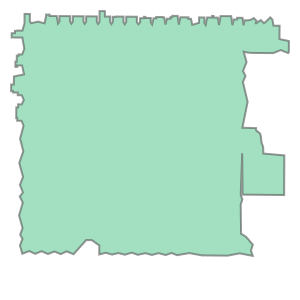

In [43]:
sdf_zip_uumain.loc[13]['SHAPE']

In [44]:
#rename to get rid of multi-level field names
sdf_zip_uumain = sdf_zip_uumain.rename(columns={('BaseDistribution', 'sum'):"BaseDistribution", ('BaseDistribution', 'size'):"BaseDistribution_Count", ('Headcount', 'sum'):"Headcount", ('Headcount', 'size'):"Headcount_Count", ('Site', ''):"Site", ('Institution', ''):"Institution", ('ZIP_Code', ''):"ZIP_Code_DELETE", ('ZIP5', ''):"ZIP5_DELETE"})
sdf_zip_uvumain = sdf_zip_uvumain.rename(columns={('BaseDistribution', 'sum'):"BaseDistribution", ('BaseDistribution', 'size'):"BaseDistribution_Count", ('Headcount', 'sum'):"Headcount", ('Headcount', 'size'):"Headcount_Count", ('Site', ''):"Site", ('Institution', ''):"Institution", ('ZIP_Code', ''):"ZIP_Code_DELETE", ('ZIP5', ''):"ZIP5_DELETE"})
sdf_zip_slccmain = sdf_zip_slccmain.rename(columns={('BaseDistribution', 'sum'):"BaseDistribution", ('BaseDistribution', 'size'):"BaseDistribution_Count", ('Headcount', 'sum'):"Headcount", ('Headcount', 'size'):"Headcount_Count", ('Site', ''):"Site", ('Institution', ''):"Institution", ('ZIP_Code', ''):"ZIP_Code_DELETE", ('ZIP5', ''):"ZIP5_DELETE"})
sdf_zip_wsumain = sdf_zip_wsumain.rename(columns={('BaseDistribution', 'sum'):"BaseDistribution", ('BaseDistribution', 'size'):"BaseDistribution_Count", ('Headcount', 'sum'):"Headcount", ('Headcount', 'size'):"Headcount_Count", ('Site', ''):"Site", ('Institution', ''):"Institution", ('ZIP_Code', ''):"ZIP_Code_DELETE", ('ZIP5', ''):"ZIP5_DELETE"})
sdf_zip_uumain = sdf_zip_uumain.drop(columns=['ZIP_Code_DELETE', 'ZIP5_DELETE'])
sdf_zip_uvumain = sdf_zip_uvumain.drop(columns=['ZIP_Code_DELETE', 'ZIP5_DELETE'])
sdf_zip_slccmain = sdf_zip_slccmain.drop(columns=['ZIP_Code_DELETE', 'ZIP5_DELETE'])
sdf_zip_wsumain = sdf_zip_wsumain.drop(columns=['ZIP_Code_DELETE', 'ZIP5_DELETE'])

In [45]:
print(sdf_zip_uumain.columns)
print(sdf_zip_uumain.sum())

Index(['FID', 'zip5', 'countynbr', 'name', 'symbol', 'SHAPE', 'zip5int',
       'Institution', 'Site', 'Headcount_Count', 'Headcount',
       'BaseDistribution_Count', 'BaseDistribution'],
      dtype='object')
FID                                                                    9679
zip5                      8464584045840138406584070840948409384088840818...
countynbr                 1225251818181818181818181818181818181818181862...
name                      MONASARATOGA SPRINGSCEDAR VALLEYRIVERTONSANDYS...
symbol                                                                  254
zip5int                                                             7239392
Institution               UUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUU...
Site                      Main CampusMain CampusMain CampusMain CampusMa...
Headcount_Count                                                         171
Headcount                                                             26470
BaseDistribution_Count       

In [46]:
print(sdf_zip_uvumain.columns)
print(sdf_zip_uvumain.sum())

Index(['FID', 'zip5', 'countynbr', 'name', 'symbol', 'SHAPE', 'zip5int',
       'Institution', 'Site', 'Headcount_Count', 'Headcount',
       'BaseDistribution_Count', 'BaseDistribution'],
      dtype='object')
FID                                                                   10174
zip5                      8464584045840138406584070840948409384088840818...
countynbr                 1225251818181818181818181818181818181818186251...
name                      MONASARATOGA SPRINGSCEDAR VALLEYRIVERTONSANDYS...
symbol                                                                  259
zip5int                                                             7324555
Institution               UVUUVUUVUUVUUVUUVUUVUUVUUVUUVUUVUUVUUVUUVUUVUU...
Site                      Main CampusMain CampusMain CampusMain CampusMa...
Headcount_Count                                                         169
Headcount                                                             24201
BaseDistribution_Count       

In [47]:
print(sdf_zip_slccmain.columns)
print(sdf_zip_slccmain.sum())

Index(['FID', 'zip5', 'countynbr', 'name', 'symbol', 'SHAPE', 'zip5int',
       'Institution', 'Site', 'Headcount_Count', 'Headcount',
       'BaseDistribution_Count', 'BaseDistribution'],
      dtype='object')
FID                                                                    9183
zip5                      8404584013840658407084094840938408884081841208...
countynbr                 2525181818181818181818181818181818181818625181...
name                      SARATOGA SPRINGSCEDAR VALLEYRIVERTONSANDYSANDY...
symbol                                                                  237
zip5int                                                             6733239
Institution               SLCCSLCCSLCCSLCCSLCCSLCCSLCCSLCCSLCCSLCCSLCCSL...
Site                      Main CampusMain CampusMain CampusMain CampusMa...
Headcount_Count                                                         148
Headcount                                                             11594
BaseDistribution_Count       

In [48]:
print(sdf_zip_wsumain.columns)
print(sdf_zip_wsumain.sum())

Index(['FID', 'zip5', 'countynbr', 'name', 'symbol', 'SHAPE', 'zip5int',
       'Institution', 'Site', 'Headcount_Count', 'Headcount',
       'BaseDistribution_Count', 'BaseDistribution'],
      dtype='object')
FID                                                                    9352
zip5                      8464584045840658407084094840938408884081841208...
countynbr                 1225181818181818181818181818181818181818625181...
name                      MONASARATOGA SPRINGSRIVERTONSANDYSANDYSANDYWES...
symbol                                                                  242
zip5int                                                             6819443
Institution               WSUWSUWSUWSUWSUWSUWSUWSUWSUWSUWSUWSUWSUWSUWSUW...
Site                      Main CampusMain CampusMain CampusMain CampusMa...
Headcount_Count                                                         159
Headcount                                                             12117
BaseDistribution_Count       

In [49]:
sdf_zip_uumain_totals = sdf_zip_uumain.sum().filter(items=(['BaseDistribution','Headcount']))

#variables for holding totals that will be used in cacluating shares
BD_Total = sdf_zip_uumain_totals.filter(items=(['BaseDistribution'])).iloc[0]
HC_Total = sdf_zip_uumain_totals.filter(items=(['Headcount'])).iloc[0]

print(BD_Total)
print(HC_Total)

#calcuate shares
sdf_zip_uumain["BD_Share"] = sdf_zip_uumain.BaseDistribution / BD_Total * 100
sdf_zip_uumain["HC_Share"] = sdf_zip_uumain.Headcount / HC_Total * 100

print(sdf_zip_uumain.sum())

20803.75
26470
FID                                                                    9679
zip5                      8464584045840138406584070840948409384088840818...
countynbr                 1225251818181818181818181818181818181818181862...
name                      MONASARATOGA SPRINGSCEDAR VALLEYRIVERTONSANDYS...
symbol                                                                  254
zip5int                                                             7239392
Institution               UUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUU...
Site                      Main CampusMain CampusMain CampusMain CampusMa...
Headcount_Count                                                         171
Headcount                                                             26470
BaseDistribution_Count                                                 2865
BaseDistribution                                                    20803.8
BD_Share                                                                1

In [50]:
sdf_zip_uvumain_totals = sdf_zip_uvumain.sum().filter(items=(['BaseDistribution','Headcount']))

#variables for holding totals that will be used in cacluating shares
BD_Total = sdf_zip_uvumain_totals.filter(items=(['BaseDistribution'])).iloc[0]
HC_Total = sdf_zip_uvumain_totals.filter(items=(['Headcount'])).iloc[0]

print (BD_Total)
print (HC_Total)

#calcuate shares
sdf_zip_uvumain["BD_Share"] = sdf_zip_uvumain.BaseDistribution / BD_Total * 100
sdf_zip_uvumain["HC_Share"] = sdf_zip_uvumain.Headcount / HC_Total * 100
sdf_zip_uvumain.sum()

26059.0
24201


FID                                                                   10174
zip5                      8464584045840138406584070840948409384088840818...
countynbr                 1225251818181818181818181818181818181818186251...
name                      MONASARATOGA SPRINGSCEDAR VALLEYRIVERTONSANDYS...
symbol                                                                  259
zip5int                                                             7324555
Institution               UVUUVUUVUUVUUVUUVUUVUUVUUVUUVUUVUUVUUVUUVUUVUU...
Site                      Main CampusMain CampusMain CampusMain CampusMa...
Headcount_Count                                                         169
Headcount                                                             24201
BaseDistribution_Count                                                 2876
BaseDistribution                                                      26059
BD_Share                                                                100
HC_Share    

In [51]:
sdf_zip_slccmain_totals = sdf_zip_slccmain.sum().filter(items=(['BaseDistribution','Headcount']))

#variables for holding totals that will be used in cacluating shares
BD_Total = sdf_zip_slccmain_totals.filter(items=(['BaseDistribution'])).iloc[0]
HC_Total = sdf_zip_slccmain_totals.filter(items=(['Headcount'])).iloc[0]

print(BD_Total)
print(HC_Total)

#calcuate shares
sdf_zip_slccmain["BD_Share"] = sdf_zip_slccmain.BaseDistribution / BD_Total * 100
sdf_zip_slccmain["HC_Share"] = sdf_zip_slccmain.Headcount / HC_Total * 100

print(sdf_zip_slccmain.sum())

380.0
11594
FID                                                                    9183
zip5                      8404584013840658407084094840938408884081841208...
countynbr                 2525181818181818181818181818181818181818625181...
name                      SARATOGA SPRINGSCEDAR VALLEYRIVERTONSANDYSANDY...
symbol                                                                  237
zip5int                                                             6733239
Institution               SLCCSLCCSLCCSLCCSLCCSLCCSLCCSLCCSLCCSLCCSLCCSL...
Site                      Main CampusMain CampusMain CampusMain CampusMa...
Headcount_Count                                                         148
Headcount                                                             11594
BaseDistribution_Count                                                 2796
BaseDistribution                                                        380
BD_Share                                                                100


In [52]:
sdf_zip_wsumain_totals = sdf_zip_wsumain.sum().filter(items=(['BaseDistribution','Headcount']))

#variables for holding totals that will be used in cacluating shares
BD_Total = sdf_zip_wsumain_totals.filter(items=(['BaseDistribution'])).iloc[0]
HC_Total = sdf_zip_wsumain_totals.filter(items=(['Headcount'])).iloc[0]

print(BD_Total)
print(HC_Total)

#calcuate shares
sdf_zip_wsumain["BD_Share"] = sdf_zip_wsumain.BaseDistribution / BD_Total * 100
sdf_zip_wsumain["HC_Share"] = sdf_zip_wsumain.Headcount / HC_Total * 100

print(sdf_zip_wsumain.sum())

836.0
12117
FID                                                                    9352
zip5                      8464584045840658407084094840938408884081841208...
countynbr                 1225181818181818181818181818181818181818625181...
name                      MONASARATOGA SPRINGSRIVERTONSANDYSANDYSANDYWES...
symbol                                                                  242
zip5int                                                             6819443
Institution               WSUWSUWSUWSUWSUWSUWSUWSUWSUWSUWSUWSUWSUWSUWSUW...
Site                      Main CampusMain CampusMain CampusMain CampusMa...
Headcount_Count                                                         159
Headcount                                                             12117
BaseDistribution_Count                                                 2771
BaseDistribution                                                        836
BD_Share                                                                100


<h1>UofU Main TDM Base Distribution (BD) Shares Map</h1>

In [53]:
# df_basedist_rows_instsite_zipcode
m2 = gis.map('Salt Lake')

sdf_zip_uumain.spatial.plot(map_widget = m2,
                            renderer_type='c', # specify the unique value renderer using its notation 'u'
                            method='esriClassifyNaturalBreaks',  # classification algorithm
                            class_count=5,  # choose the number of classes            
                            col='BD_Share',  # numeric column to classify
                            cmap='Blues',  # color map to pick colors from for each class
                            alpha=0.7  # specify opacity
                            )
m2

MapView(layout=Layout(height='400px', width='100%'))

<h1>UofU Main Headcount (HC) Shares Map</h1>

In [54]:
# df_basedist_rows_instsite_zipcode
m3 = GIS().map('Salt Lake')

sdf_zip_uumain.spatial.plot(map_widget = m3,
                            renderer_type='c', # specify the unique value renderer using its notation 'u'
                            method='esriClassifyNaturalBreaks',  # classification algorithm
                            class_count=5,  # choose the number of classes            
                            col='HC_Share',  # numeric column to classify
                            cmap='Blues',  # color map to pick colors from for each class
                            alpha=0.7  # specify opacity
                            )
m3

MapView(layout=Layout(height='400px', width='100%'))

In [55]:
sdf_zip_uumain["ShareDiff"] = sdf_zip_uumain.apply(lambda row: row.BD_Share - row.HC_Share, axis = 1)

In [56]:
sdf_zip_uumain.sum()

FID                                                                    9679
zip5                      8464584045840138406584070840948409384088840818...
countynbr                 1225251818181818181818181818181818181818181862...
name                      MONASARATOGA SPRINGSCEDAR VALLEYRIVERTONSANDYS...
symbol                                                                  254
zip5int                                                             7239392
Institution               UUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUU...
Site                      Main CampusMain CampusMain CampusMain CampusMa...
Headcount_Count                                                         171
Headcount                                                             26470
BaseDistribution_Count                                                 2865
BaseDistribution                                                    20803.8
BD_Share                                                                100
HC_Share    

In [57]:
# df_basedist_rows_instsite_zipcode
m4 = GIS().map('Salt Lake')

sdf_zip_uumain.spatial.plot(map_widget = m4,
                            renderer_type='c', # specify the unique value renderer using its notation 'u'
                            method='esriClassifyNaturalBreaks',  # classification algorithm
                            class_count=20,  # choose the number of classes            
                            min_value=-5,
                            col='ShareDiff',  # numeric column to classify
                            cmap='RdYlGn',  # color map to pick colors from for each class
                            alpha=0.7  # specify opacity
                            )
m4

#Red: TDM Low
#Green: TDM High

MapView(layout=Layout(height='400px', width='100%'))

<h1>UofU Main Top 10 BD Greater than HC</h1>

In [58]:
sdf_zip_uumain[['zip5','BaseDistribution','Headcount','BD_Share','HC_Share','ShareDiff']].sort_values(by='ShareDiff', ascending=False).head(10)

,zip5,BaseDistribution,Headcount,BD_Share,HC_Share,ShareDiff
44,84108,2295.00,1727,11.031665,6.524367,4.507298
18,84103,1459.45,1114,7.015322,4.208538,2.806784
12,84105,1331.10,1102,6.398366,4.163204,2.235162
45,84109,1091.40,867,5.246170,3.275406,1.970763
6,84093,559.30,375,2.688458,1.416698,1.271759
62,84121,918.85,842,4.416752,3.180960,1.235792
24,84124,703.80,571,3.383044,2.157159,1.225885
25,84106,996.20,998,4.788560,3.770306,1.018254
57,84010,663.00,588,3.186925,2.221383,0.965543
21,84117,634.95,557,3.052094,2.104269,0.947825


<h1>UofU Main Top 10 HC Greater than BD</h1>

In [59]:
sdf_zip_uumain[['zip5','BaseDistribution','Headcount','BD_Share','HC_Share','ShareDiff']].sort_values(by='ShareDiff', ascending=True).head(10)

,zip5,BaseDistribution,Headcount,BD_Share,HC_Share,ShareDiff
13,84102,1567.40,3099,7.534219,11.707594,-4.173375
59,84112,6.80,946,0.032686,3.573857,-3.541171
67,84020,190.40,734,0.915220,2.772951,-1.857731
66,84096,34.00,410,0.163432,1.548923,-1.385491
8,84081,25.50,347,0.122574,1.310918,-1.188344
65,84095,161.50,462,0.776302,1.745372,-0.969070
84,84009,85.85,351,0.412666,1.326029,-0.913363
3,84065,101.15,322,0.486210,1.216471,-0.730261
75,84074,0.00,188,0.000000,0.710238,-0.710238
15,84101,77.35,246,0.371808,0.929354,-0.557546


<h1>UVU Main TDM Base Distribution (BD) Shares Map</h1>

In [60]:
# df_basedist_rows_instsite_zipcode
m5 = GIS().map('Orem')

sdf_zip_uvumain.spatial.plot(map_widget = m5,
                            renderer_type='c', # specify the unique value renderer using its notation 'u'
                            method='esriClassifyNaturalBreaks',  # classification algorithm
                            class_count=20,  # choose the number of classes            
                            col='BD_Share',  # numeric column to classify
                            cmap='Blues',  # color map to pick colors from for each class
                            alpha=0.7  # specify opacity
                            )
m5

MapView(layout=Layout(height='400px', width='100%'))

<h1>UVU Main Headcount (HC) Shares Map</h1>

In [61]:
# df_basedist_rows_instsite_zipcode
m6 = GIS().map('Orem')

sdf_zip_uvumain.spatial.plot(map_widget = m6,
                            renderer_type='c', # specify the unique value renderer using its notation 'u'
                            method='esriClassifyNaturalBreaks',  # classification algorithm
                            class_count=5,  # choose the number of classes            
                            col='HC_Share',  # numeric column to classify
                            cmap='Blues',  # color map to pick colors from for each class
                            alpha=0.7  # specify opacity
                            )
m6

MapView(layout=Layout(height='400px', width='100%'))

In [62]:
sdf_zip_uvumain["ShareDiff"] = sdf_zip_uvumain.apply(lambda row: row.BD_Share - row.HC_Share, axis = 1)

In [63]:
sdf_zip_uvumain.sum()

FID                                                                   10174
zip5                      8464584045840138406584070840948409384088840818...
countynbr                 1225251818181818181818181818181818181818186251...
name                      MONASARATOGA SPRINGSCEDAR VALLEYRIVERTONSANDYS...
symbol                                                                  259
zip5int                                                             7324555
Institution               UVUUVUUVUUVUUVUUVUUVUUVUUVUUVUUVUUVUUVUUVUUVUU...
Site                      Main CampusMain CampusMain CampusMain CampusMa...
Headcount_Count                                                         169
Headcount                                                             24201
BaseDistribution_Count                                                 2876
BaseDistribution                                                      26059
BD_Share                                                                100
HC_Share    

In [64]:
sdf_zip_uvumain[(sdf_zip_uvumain['zip5int']==84102)]

,FID,zip5,countynbr,name,symbol,SHAPE,zip5int,Institution,Site,Headcount_Count,Headcount,BaseDistribution_Count,BaseDistribution,BD_Share,HC_Share,ShareDiff
13,24,84102,18,SALT LAKE CITY,1,"{""rings"": [[[428494.2999999998, 4513354.41], [...",84102,UVU,Main Campus,2,19,22.0,10.0,0.038374,0.078509,-0.040135


In [65]:
# df_basedist_rows_instsite_zipcode
m7 = GIS().map('Orem')

sdf_zip_uvumain.spatial.plot(map_widget = m7,
                            renderer_type='c', # specify the unique value renderer using its notation 'u'
                            method='esriClassifyNaturalBreaks',  # classification algorithm
                            class_count=10,  # choose the number of classes            
                            min_value=-2.2,
                            col='ShareDiff',  # numeric column to classify
                            cmap='RdYlGn',  # color map to pick colors from for each class
                            alpha=0.7  # specify opacity
                            )
m7

#Red: TDM Low
#Green: TDM High

MapView(layout=Layout(height='400px', width='100%'))

<h1>UVU Main Top 10 BD Greater than HC</h1>

In [66]:
sdf_zip_uvumain[['zip5','BaseDistribution','Headcount','BD_Share','HC_Share','ShareDiff']].sort_values(by='ShareDiff', ascending=False).head(10)

,zip5,BaseDistribution,Headcount,BD_Share,HC_Share,ShareDiff
86,84058,5874.0,2713,22.541157,11.210281,11.330876
68,84604,3359.0,2044,12.889980,8.445932,4.444048
71,84651,1177.0,534,4.516674,2.206520,2.310153
72,84660,1420.0,915,5.449173,3.780836,1.668338
27,84042,531.0,366,2.037684,1.512334,0.525350
30,84097,1121.0,940,4.301777,3.884137,0.417640
36,84663,983.0,860,3.772209,3.553572,0.218637
70,84655,248.0,200,0.951687,0.826412,0.125274
48,84067,14.0,5,0.053724,0.020660,0.033064
37,84664,340.0,308,1.304732,1.272675,0.032057


<h1>UVU Main Top 10 HC Greater than BD</h1>

In [67]:
sdf_zip_uvumain[['zip5','BaseDistribution','Headcount','BD_Share','HC_Share','ShareDiff']].sort_values(by='ShareDiff', ascending=True).head(10)

,zip5,BaseDistribution,Headcount,BD_Share,HC_Share,ShareDiff
40,84059,68.0,577,0.260946,2.384199,-2.123253
66,84020,231.0,576,0.886450,2.380067,-1.493617
67,84606,1272.0,1535,4.881231,6.342713,-1.461482
65,84096,73.0,382,0.280134,1.578447,-1.298314
3,84065,163.0,431,0.625504,1.780918,-1.155414
42,84057,1245.0,1431,4.777620,5.912979,-1.135359
38,84601,1119.0,1265,4.294102,5.227057,-0.932955
22,84005,375.0,553,1.439042,2.285030,-0.845987
1,84045,333.0,510,1.277869,2.107351,-0.829481
64,84095,184.0,340,0.706090,1.404901,-0.698811


<h1>SLCC Main TDM Base Distribution (BD) Shares Map</h1>

In [68]:
# df_basedist_rows_instsite_zipcode
m8 = GIS().map('Salt Lake')

sdf_zip_slccmain.spatial.plot(map_widget = m8,
                              renderer_type='c', # specify the unique value renderer using its notation 'u'
                              method='esriClassifyNaturalBreaks',  # classification algorithm
                              class_count=5,  # choose the number of classes            
                              col='BD_Share',  # numeric column to classify
                              cmap='Blues',  # color map to pick colors from for each class
                              alpha=0.7  # specify opacity
                              )
m8

MapView(layout=Layout(height='400px', width='100%'))

<h1>SLCC Main Headcount (HC) Shares Map</h1>

In [69]:
# df_basedist_rows_instsite_zipcode
m9 = GIS().map('Salt Lake')

sdf_zip_slccmain.spatial.plot(map_widget = m9,
                            renderer_type='c', # specify the unique value renderer using its notation 'u'
                            method='esriClassifyNaturalBreaks',  # classification algorithm
                            class_count=5,  # choose the number of classes            
                            col='HC_Share',  # numeric column to classify
                            cmap='Blues',  # color map to pick colors from for each class
                            alpha=0.7  # specify opacity
                            )
m9

MapView(layout=Layout(height='400px', width='100%'))

In [70]:
sdf_zip_slccmain["ShareDiff"] = sdf_zip_slccmain.apply(lambda row: row.BD_Share - row.HC_Share, axis = 1)

In [71]:
sdf_zip_slccmain.sum()

FID                                                                    9183
zip5                      8404584013840658407084094840938408884081841208...
countynbr                 2525181818181818181818181818181818181818625181...
name                      SARATOGA SPRINGSCEDAR VALLEYRIVERTONSANDYSANDY...
symbol                                                                  237
zip5int                                                             6733239
Institution               SLCCSLCCSLCCSLCCSLCCSLCCSLCCSLCCSLCCSLCCSLCCSL...
Site                      Main CampusMain CampusMain CampusMain CampusMa...
Headcount_Count                                                         148
Headcount                                                             11594
BaseDistribution_Count                                                 2796
BaseDistribution                                                        380
BD_Share                                                                100
HC_Share    

In [72]:
# df_basedist_rows_instsite_zipcode
ma = GIS().map('Salt Lake')

sdf_zip_slccmain.spatial.plot(map_widget = ma,
                            renderer_type='c', # specify the unique value renderer using its notation 'u'
                            method='esriClassifyNaturalBreaks',  # classification algorithm
                            class_count=20,  # choose the number of classes            
                            min_value=-2,
                            col='ShareDiff',  # numeric column to classify
                            cmap='RdYlGn',  # color map to pick colors from for each class
                            alpha=0.7  # specify opacity
                            )
ma

#Red: TDM Low
#Green: TDM High

MapView(layout=Layout(height='400px', width='100%'))

<h1>SLCC Main Top 10 BD Greater than HC</h1>

In [73]:
sdf_zip_slccmain[['zip5','BaseDistribution','Headcount','BD_Share','HC_Share','ShareDiff']].sort_values(by='ShareDiff', ascending=False).head(10)

,zip5,BaseDistribution,Headcount,BD_Share,HC_Share,ShareDiff
53,84010,15.0,202,3.947368,1.742280,2.205088
77,84129,23.0,484,6.052632,4.174573,1.878059
18,84047,17.0,313,4.473684,2.699672,1.774012
0,84045,8.0,45,2.105263,0.388132,1.717131
67,84660,6.0,13,1.578947,0.112127,1.466820
76,84123,19.0,441,5.000000,3.803692,1.196308
21,84005,6.0,57,1.578947,0.491634,1.087314
3,84070,12.0,246,3.157895,2.121787,1.036108
13,84111,6.0,73,1.578947,0.629636,0.949311
79,84058,4.0,18,1.052632,0.155253,0.897379


<h1>SLCC Main Top 10 HC Greater than BD</h1>

In [74]:
sdf_zip_slccmain[['zip5','BaseDistribution','Headcount','BD_Share','HC_Share','ShareDiff']].sort_values(by='ShareDiff', ascending=True).head(10)

,zip5,BaseDistribution,Headcount,BD_Share,HC_Share,ShareDiff
7,84081,11.0,536,2.894737,4.623081,-1.728344
68,84074,0.0,170,0.000000,1.466276,-1.466276
6,84088,8.0,389,2.105263,3.355184,-1.249921
22,84124,1.0,169,0.263158,1.457651,-1.194493
60,84095,6.0,311,1.578947,2.682422,-1.103475
9,84128,9.0,397,2.368421,3.424185,-1.055764
74,84119,16.0,607,4.210526,5.235467,-1.024940
56,84107,9.0,393,2.368421,3.389684,-1.021263
73,84118,11.0,445,2.894737,3.838192,-0.943455
17,84116,7.0,318,1.842105,2.742798,-0.900693


<h1>WSU Main TDM Base Distribution (BD) Shares Map</h1>

In [75]:
# df_basedist_rows_instsite_zipcode
mb = GIS().map('Ogden')

sdf_zip_wsumain.spatial.plot(map_widget = mb,
                              renderer_type='c', # specify the unique value renderer using its notation 'u'
                              method='esriClassifyNaturalBreaks',  # classification algorithm
                              class_count=5,  # choose the number of classes            
                              col='BD_Share',  # numeric column to classify
                              cmap='Blues',  # color map to pick colors from for each class
                              alpha=0.7  # specify opacity
                              )
mb

MapView(layout=Layout(height='400px', width='100%'))

<h1>WSU Main Headcount (HC) Shares Map</h1>

In [76]:
# df_basedist_rows_instsite_zipcode
mc = GIS().map('Ogden')

sdf_zip_wsumain.spatial.plot(map_widget = mc,
                            renderer_type='c', # specify the unique value renderer using its notation 'u'
                            method='esriClassifyNaturalBreaks',  # classification algorithm
                            class_count=5,  # choose the number of classes            
                            col='HC_Share',  # numeric column to classify
                            cmap='Blues',  # color map to pick colors from for each class
                            alpha=0.7  # specify opacity
                            )
mc

MapView(layout=Layout(height='400px', width='100%'))

In [77]:
sdf_zip_wsumain["ShareDiff"] = sdf_zip_wsumain.apply(lambda row: row.BD_Share - row.HC_Share, axis = 1)

In [78]:
sdf_zip_wsumain.sum()

FID                                                                    9352
zip5                      8464584045840658407084094840938408884081841208...
countynbr                 1225181818181818181818181818181818181818625181...
name                      MONASARATOGA SPRINGSRIVERTONSANDYSANDYSANDYWES...
symbol                                                                  242
zip5int                                                             6819443
Institution               WSUWSUWSUWSUWSUWSUWSUWSUWSUWSUWSUWSUWSUWSUWSUW...
Site                      Main CampusMain CampusMain CampusMain CampusMa...
Headcount_Count                                                         159
Headcount                                                             12117
BaseDistribution_Count                                                 2771
BaseDistribution                                                        836
BD_Share                                                                100
HC_Share    

In [79]:
# df_basedist_rows_instsite_zipcode
md = GIS().map('Ogden')

sdf_zip_wsumain.spatial.plot(map_widget = md,
                            renderer_type='c', # specify the unique value renderer using its notation 'u'
                            method='esriClassifyNaturalBreaks',  # classification algorithm
                            class_count=20,  # choose the number of classes            
                            min_value=-2.5,
                            col='ShareDiff',  # numeric column to classify
                            cmap='RdYlGn',  # color map to pick colors from for each class
                            alpha=0.7  # specify opacity
                            )
md

#Red: TDM Low
#Green: TDM High

MapView(layout=Layout(height='400px', width='100%'))

<h1>WSU Main Top 10 BD Greater than HC</h1>

In [80]:
sdf_zip_wsumain[['zip5','BaseDistribution','Headcount','BD_Share','HC_Share','ShareDiff']].sort_values(by='ShareDiff', ascending=False).head(10)

,zip5,BaseDistribution,Headcount,BD_Share,HC_Share,ShareDiff
71,84408,66.0,82,7.894737,0.676735,7.218002
34,84403,127.0,1473,15.191388,12.156474,3.034913
46,84067,57.0,615,6.818182,5.075514,1.742668
49,84015,78.0,972,9.330144,8.021788,1.308356
31,84302,20.0,212,2.392344,1.749608,0.642737
28,84404,80.0,1082,9.569378,8.929603,0.639775
54,84010,28.0,341,3.349282,2.814228,0.535054
68,84660,5.0,12,0.598086,0.099034,0.499052
72,84043,4.0,30,0.478469,0.247586,0.230883
29,84097,2.0,4,0.239234,0.033011,0.206223


<h1>WSU Main Top 10 HC Greater than BD</h1>

In [81]:
sdf_zip_wsumain[['zip5','BaseDistribution','Headcount','BD_Share','HC_Share','ShareDiff']].sort_values(by='ShareDiff', ascending=True).head(10)

,zip5,BaseDistribution,Headcount,BD_Share,HC_Share,ShareDiff
47,84075,18.0,556,2.153110,4.588595,-2.435484
52,84037,33.0,663,3.947368,5.471651,-1.524283
33,84405,50.0,892,5.980861,7.361558,-1.380697
51,84040,26.0,538,3.110048,4.440043,-1.329995
48,84041,45.0,798,5.382775,6.585789,-1.203013
24,84025,11.0,298,1.315789,2.459355,-1.143565
30,84310,0.0,109,0.000000,0.899563,-0.899563
27,84414,48.0,787,5.741627,6.495007,-0.753380
45,84315,8.0,204,0.956938,1.683585,-0.726647
69,84074,0.0,72,0.000000,0.594206,-0.594206
